# Data Visualization using matplotlib
Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City
Dataset: "City_Air_Quality.csv"
Description: The dataset contains information about air quality measurements in a specific
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g., PM2.5,
PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib library
to create visualizations that effectively represent the AQI trends and patterns for different
pollutants in the city.
Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels,
and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different
pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and
pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color
schemes.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("air_quality_data.csv")
data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [3]:
data.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
data.shape

(737406, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737406 entries, 0 to 737405
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        737406 non-null  object 
 1   Datetime    737406 non-null  object 
 2   PM2.5       587720 non-null  float64
 3   PM10        429529 non-null  float64
 4   NO          617192 non-null  float64
 5   NO2         616699 non-null  float64
 6   NOx         609997 non-null  float64
 7   NH3         454536 non-null  float64
 8   CO          648830 non-null  float64
 9   SO2         603179 non-null  float64
 10  O3          604176 non-null  float64
 11  Benzene     568137 non-null  float64
 12  Toluene     508758 non-null  float64
 13  Xylene      263468 non-null  float64
 14  AQI         603645 non-null  float64
 15  AQI_Bucket  603645 non-null  object 
dtypes: float64(13), object(3)
memory usage: 90.0+ MB


In [6]:
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Datetime']

0        2015-01-01 01:00:00
1        2015-01-01 02:00:00
2        2015-01-01 03:00:00
3        2015-01-01 04:00:00
4        2015-01-01 05:00:00
                 ...        
737401   2020-06-27 00:00:00
737402   2020-06-28 00:00:00
737403   2020-06-29 00:00:00
737404   2020-06-30 00:00:00
737405   2020-07-01 00:00:00
Name: Datetime, Length: 737406, dtype: datetime64[ns]

In [7]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,587720.000000,429529.000000,617192.000000,616699.000000,609997.000000,454536.00000,648830.000000,603179.000000,604176.000000,568137.000000,508758.000000,263468.000000,603645.000000
mean,67.615679,119.035184,17.428187,28.871505,32.288461,23.60270,2.186294,14.059323,34.785994,3.095727,8.662618,3.127918,166.415562
std,74.331004,103.678358,31.758813,28.980321,39.452857,28.70589,10.830938,19.257355,29.509072,16.429980,21.669094,7.775396,161.287129
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.01000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.290000,52.540000,3.900000,10.850000,10.730000,8.14000,0.420000,4.910000,13.650000,0.060000,0.370000,0.100000,79.000000
50%,46.500000,91.710000,8.040000,20.380000,20.900000,15.39000,0.810000,8.400000,26.480000,0.870000,2.610000,0.800000,116.000000
75%,79.500000,147.650000,16.330000,36.420000,37.280000,29.27000,1.370000,14.800000,47.500000,2.770000,8.440000,3.140000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.97000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [8]:
num_cols = ['SO2', 'NO2', 'Benzene', 'Toluene', 'Xylene', 'PM2.5']

for col in num_cols:
    data[col].fillna(data[col].mean(),inplace=True)

In [9]:
data.isna().sum()

City               0
Datetime           0
PM2.5              0
PM10          307877
NO            120214
NO2                0
NOx           127409
NH3           282870
CO             88576
SO2                0
O3            133230
Benzene            0
Toluene            0
Xylene             0
AQI           133761
AQI_Bucket    133761
dtype: int64

In [10]:
data['year'] = data['Datetime'].dt.year

In [11]:
data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01 01:00:00,67.615679,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN,2015
1,Ahmedabad,2015-01-01 02:00:00,67.615679,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN,2015
2,Ahmedabad,2015-01-01 03:00:00,67.615679,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN,2015
3,Ahmedabad,2015-01-01 04:00:00,67.615679,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN,2015
4,Ahmedabad,2015-01-01 05:00:00,67.615679,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN,2015


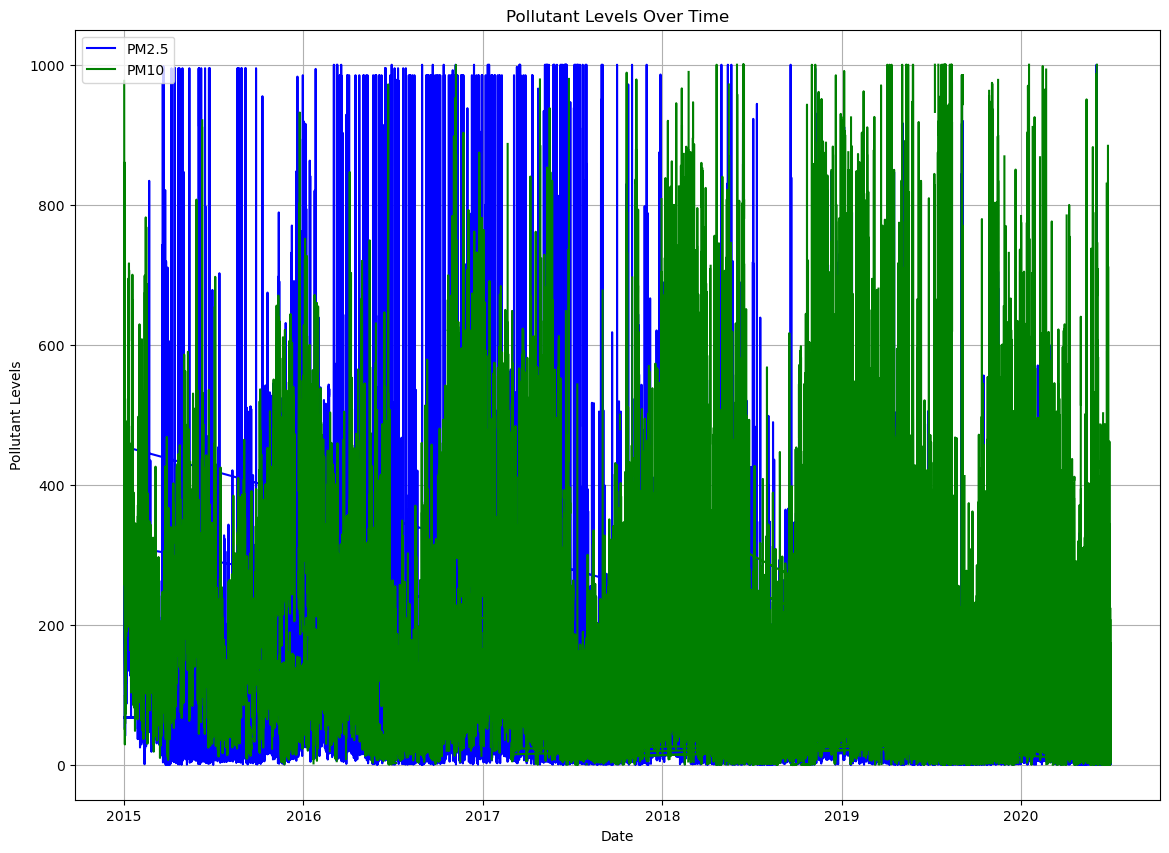

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))

# Plot PM2.5 and PM10 levels over time
plt.plot(data['Datetime'], data['PM2.5'], label='PM2.5', color='blue')
plt.plot(data['Datetime'], data['PM10'], label='PM10', color='green')

plt.title('Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Levels')
plt.legend()
plt.grid(True)
plt.show()

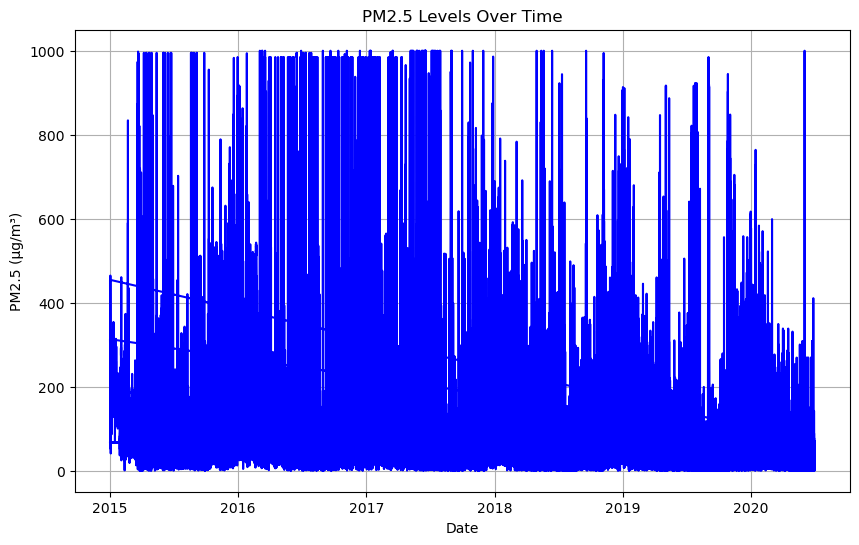

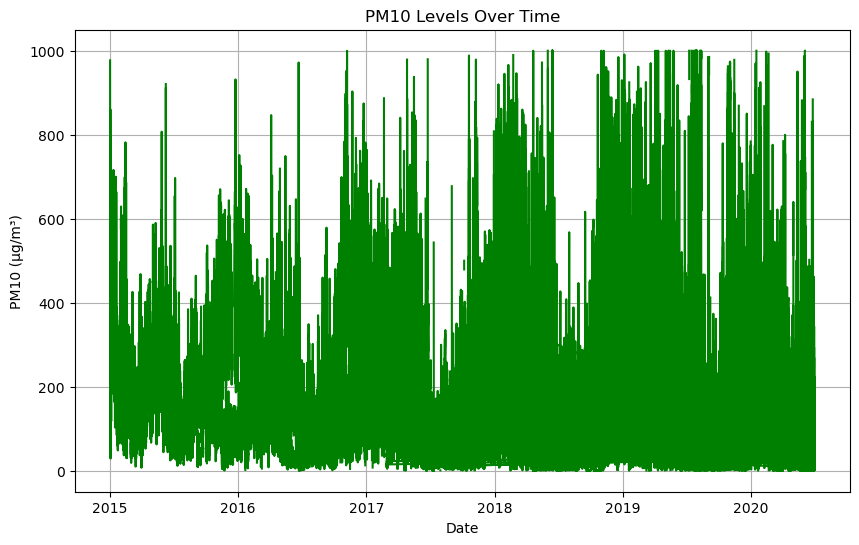

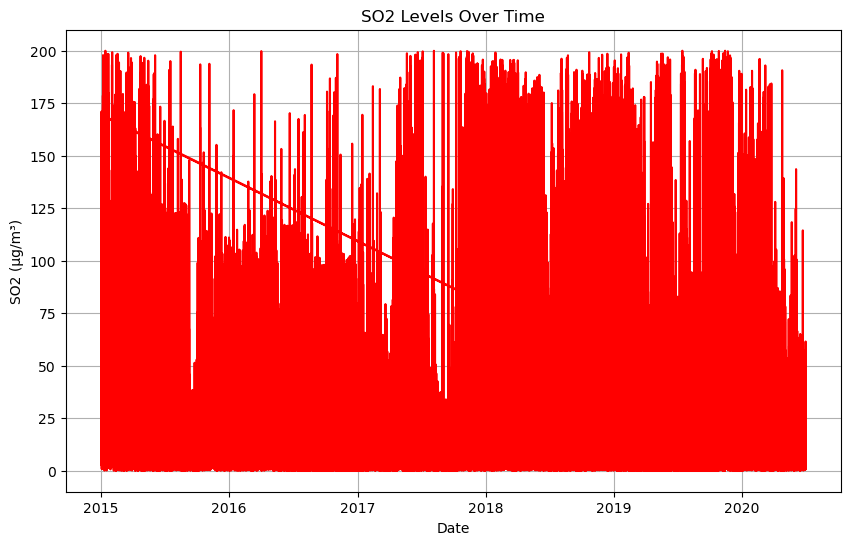

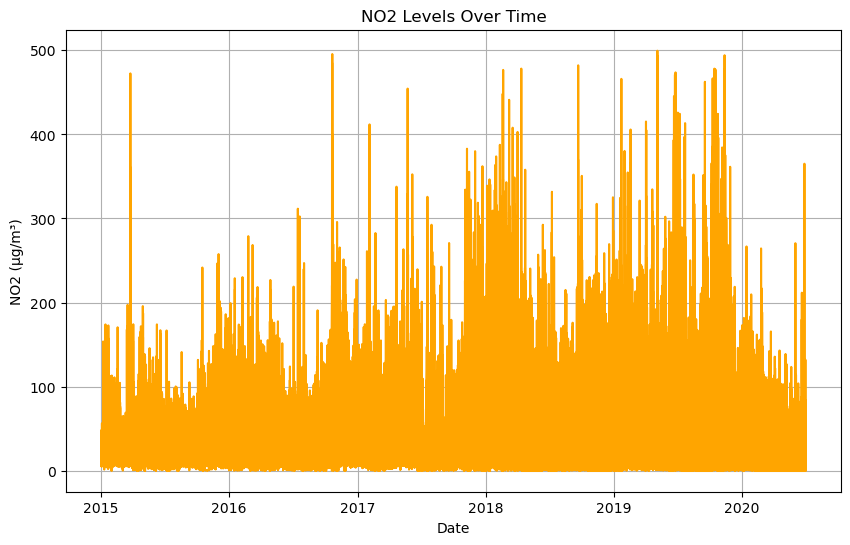

In [13]:
# PM2.5
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['PM2.5'], label='PM2.5', color='blue')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

# PM10
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['PM10'], label='PM10', color='green')
plt.title('PM10 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.grid(True)
plt.show()

# SO2
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['SO2'], label='SO2', color='red')
plt.title('SO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('SO2 (µg/m³)')
plt.grid(True)
plt.show()

# NO2
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['NO2'], label='NO2', color='orange')
plt.title('NO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)
plt.show()

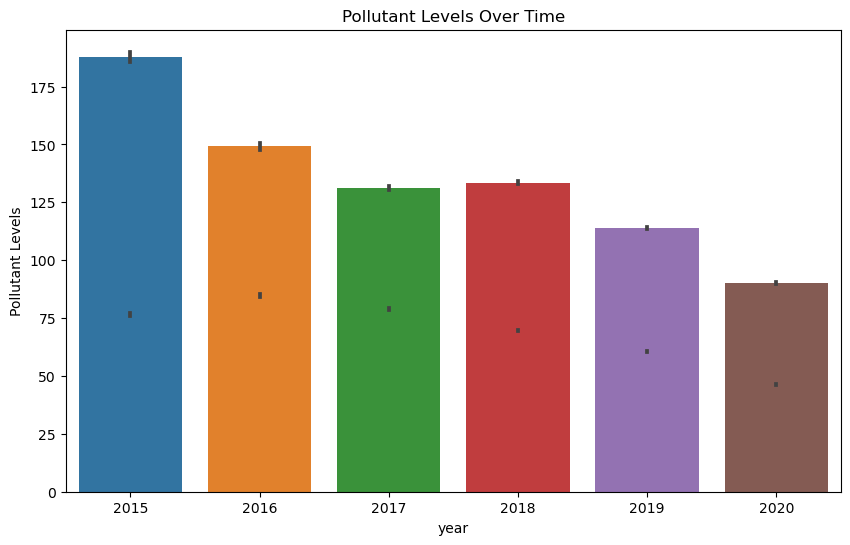

In [24]:
plt.figure(figsize=(10, 6))

sns.barplot(x='year', y='PM2.5', data=data)
sns.barplot(x='year', y='PM10', data=data)
plt.title('Pollutant Levels Over Time')
plt.xlabel('year')
plt.ylabel('Pollutant Levels')
#plt.xticks(rotation=90)
plt.show()

# Plot PM2.5 and PM10 levels over time
#plt.bar(data['year'], data['PM2.5'], label='PM2.5', color='blue')
#plt.bar(data['year'], data['PM10'], label='PM10', color='green')

#plt.title('Pollutant Levels Over Time')
#plt.xlabel('year')
#plt.ylabel('Pollutant Levels')
#plt.legend()
#plt.grid(True)
#plt.show()

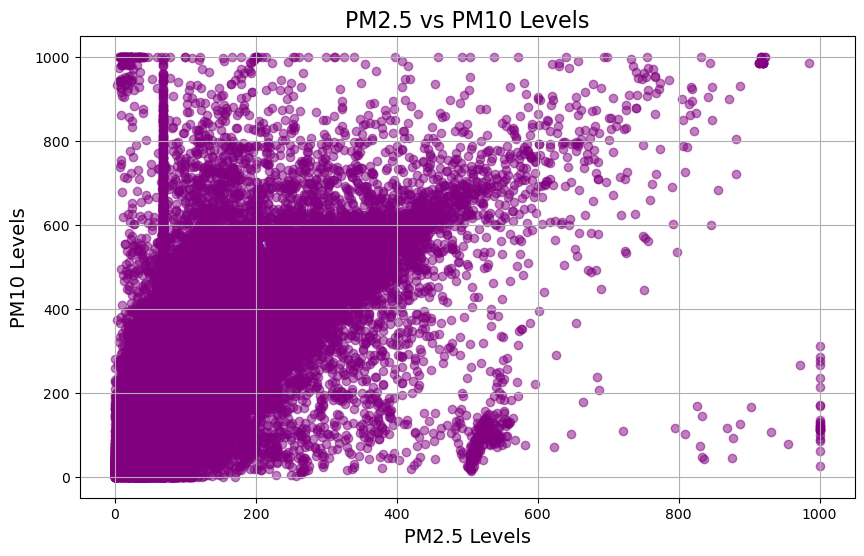

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data['PM2.5'], data['PM10'], color='purple', alpha=0.5)
plt.title('PM2.5 vs PM10 Levels', fontsize=16)
plt.xlabel('PM2.5 Levels', fontsize=14)
plt.ylabel('PM10 Levels', fontsize=14)
plt.grid(True)
plt.show()